In [1]:
# !pip install xgboost
# !pip install pyarrow

In [2]:
# !pip install pycaret[analysis]

In [3]:
# !pip install shap

In [4]:
# !pip install pycaret --ignore-installed llvmlite numba

In [5]:
from pycaret.classification import *

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import xgboost as xgb
root = 'C:/Users/Pratham/Documents/GitHub/instacart-customer-purchase-prediction/data/'
from sklearn.neural_network import MLPClassifier
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [7]:
order_products = pd.read_parquet(root + 'feature_engineer_dataset.parquet')

In [8]:
order_products.shape

(1384617, 22)

In [9]:
# filter data where eval_set = 'train'

order_products = order_products[order_products.eval_set == 'train']

In [10]:
order_products.shape

(1384617, 22)

In [11]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   order_id                         1384617 non-null  int32  
 1   product_id                       1384617 non-null  int32  
 2   add_to_cart_order                1384617 non-null  int16  
 3   reordered                        1384617 non-null  int8   
 4   product_name                     1384617 non-null  object 
 5   aisle_id                         1384617 non-null  int16  
 6   department_id                    1384617 non-null  int8   
 7   aisle                            1384617 non-null  object 
 8   department                       1384617 non-null  object 
 9   user_id                          1384617 non-null  int32  
 10  eval_set                         1384617 non-null  object 
 11  order_number                     1384617 non-null 

In [12]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,total_orders_by_user,user_reorder_percentage,user_avg_days_since_prior_order,user_most_frequent_order_dow,user_most_frequent_order_hour,total_times_product_reordered,product_reorder_percentage
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,101.0,0.619632
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,3192.0,0.713775
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,12498.0,0.524553
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,67313.0,0.691702
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,312.0,0.477795


In [13]:
exp_clf = setup(order_products, target = 'reordered',session_id = 2 , fold=3, max_encoding_ohe=100,memory=False,remove_multicollinearity = True,pca = True,pca_components = 15, ignore_features=['aisle_id','order_id', 'product_id', 'user_id','department_id', 'eval_set'],categorical_features=['aisle', 'department','product_name','order_dow','order_hour_of_day'],numeric_imputation=0)

,Description,Value
0,Session id,2
1,Target,reordered
2,Target type,Binary
3,Original data shape,"(1384617, 22)"
4,Transformed data shape,"(1384617, 16)"
5,Transformed train set shape,"(969231, 16)"
6,Transformed test set shape,"(415386, 16)"
7,Ignore features,6
8,Numeric features,10
9,Categorical features,5


In [14]:
prep_pipe = get_config('X_train_transformed') 
prep_pipe.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
268293,-22272.070470,-9.706819,-18.601597,-6.713405,-15.911670,-0.379786,2.528243,-0.018444,-0.783531,-0.114132,-0.462459,0.510284,0.632560,0.071189,0.007730
908635,31838.929458,-10.289027,-3.106964,-2.178476,4.928612,3.364899,-2.567033,0.908465,-0.431307,0.028175,0.083565,0.199816,0.028245,-0.003097,-0.034569
90259,-21258.070491,-9.429235,-2.718530,-6.821482,2.885319,3.392417,-2.565023,-0.280835,0.107259,-0.006841,-0.646339,-0.064694,0.775818,0.048189,-0.094739
358944,-21848.070598,-16.509608,7.598263,-4.419800,0.620133,-4.404867,3.476225,-0.268900,0.022628,-0.688280,0.424026,-0.487751,0.116485,0.055728,-0.043968
16928,-24793.070412,1.453904,-12.148716,-4.202449,-7.374914,-8.621505,-1.510348,-0.313102,0.031485,-0.062210,-0.647169,-0.012658,0.721145,0.061538,-0.043463


In [15]:

#  create custom model pycaret
model=create_model( xgb.XGBClassifier(class_weight='balanced'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6959,0.7505,0.8074,0.7190,0.7607,0.3474,0.3518
1,0.6963,0.7515,0.8100,0.7185,0.7615,0.3477,0.3524
2,0.6968,0.7508,0.8092,0.7193,0.7616,0.3491,0.3537
Mean,0.6963,0.7510,0.8089,0.7190,0.7613,0.3481,0.3527
Std,0.0004,0.0004,0.0011,0.0003,0.0004,0.0008,0.0008


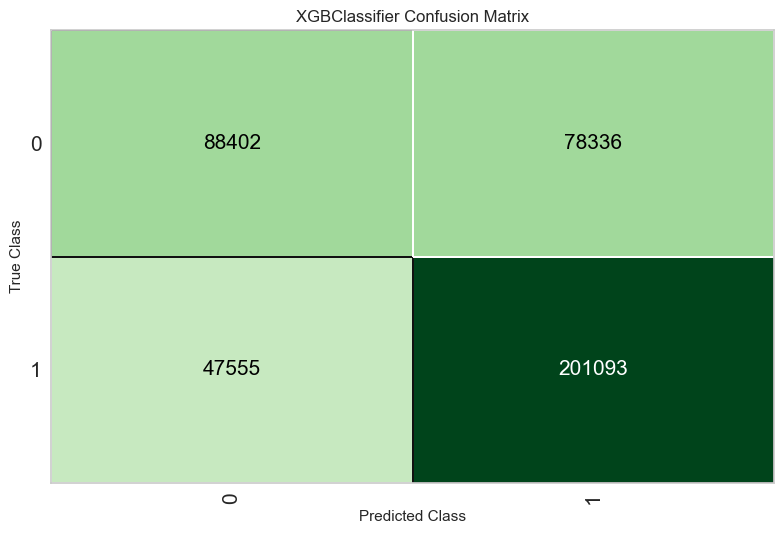

In [16]:
plot_model(model, plot = 'confusion_matrix')

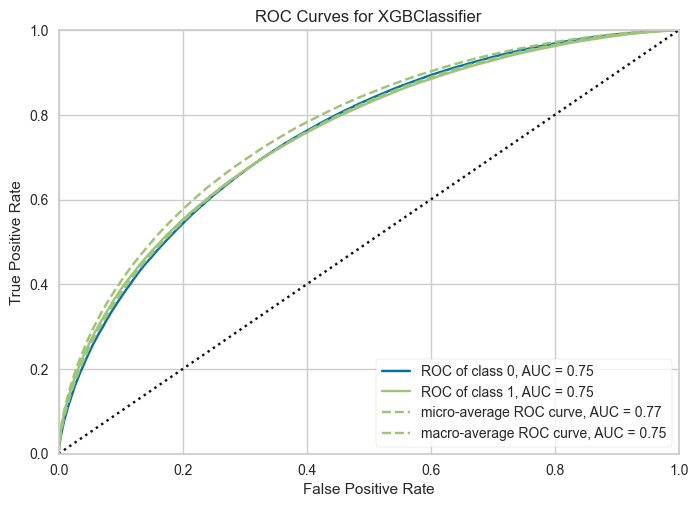

In [17]:
plot_model(model)

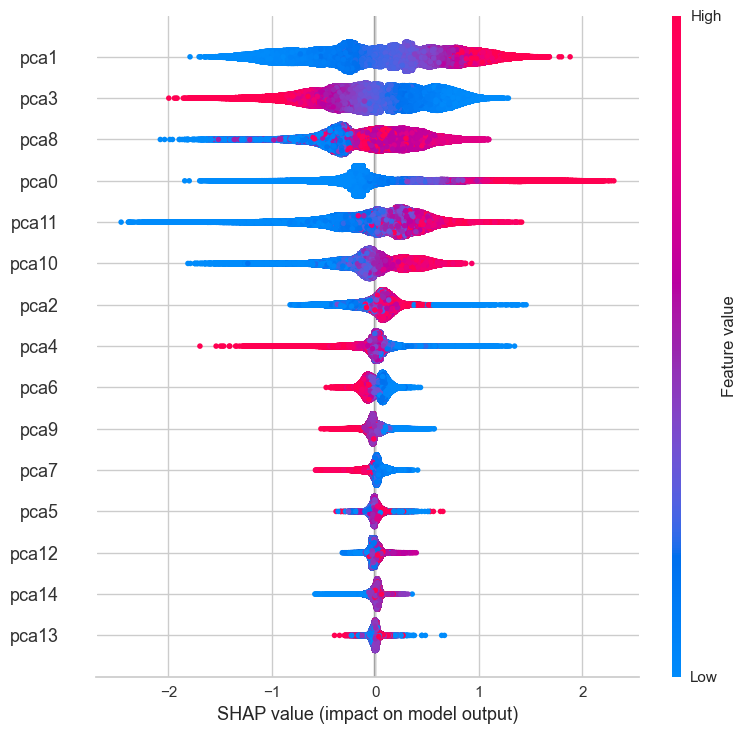

In [18]:
interpret_model(model)


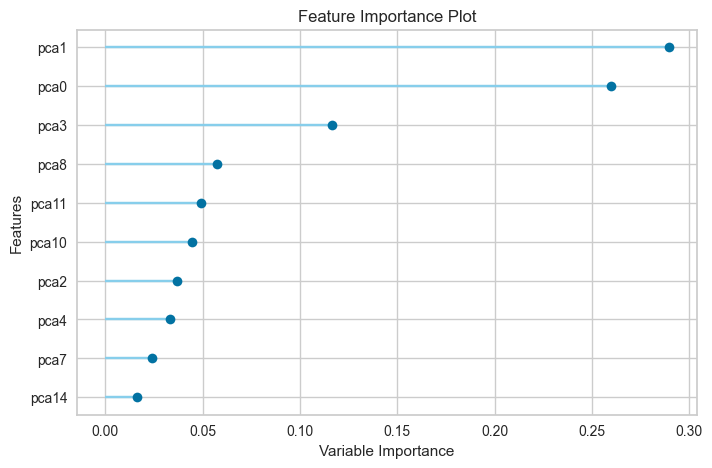

In [21]:
plot_model(model, plot='feature')
